<a href="https://colab.research.google.com/github/Arjunkalliyadath/Github-Project/blob/main/Case_Study_Supervised_Learning_(16_01_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Dataset

In [123]:
train_df = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/Training_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/Testing_data.csv')
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [124]:
train_df.shape

(5634, 21)

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


# EDA

Distribution of Churn (Target)

In [126]:
train_df['Churn'].value_counts()

,count
Churn,
No,4130
Yes,1504


Visual

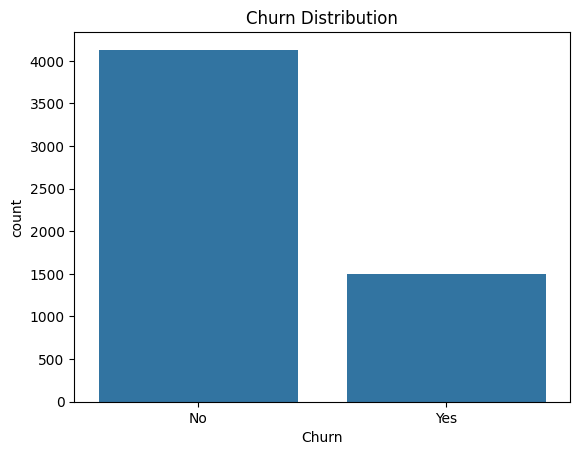

In [127]:
sns.countplot(x='Churn', data=train_df)
plt.title("Churn Distribution")
plt.show()

Missing Values

In [128]:
train_df.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


Fixing the TotalCharges Column

In [129]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df['TotalCharges'].isnull().sum()

np.int64(290)

Numerical Feature Analysis

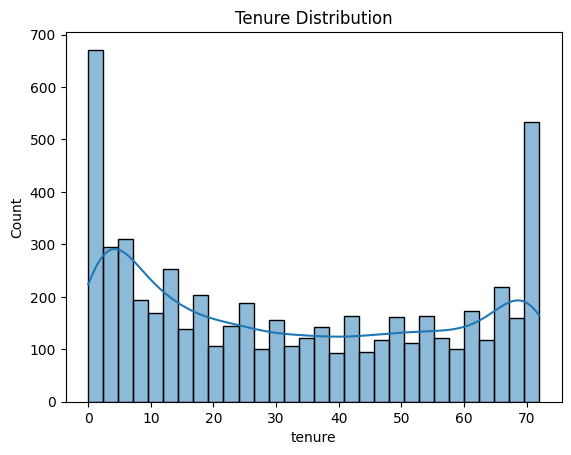

In [130]:
#Tenure
sns.histplot(train_df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

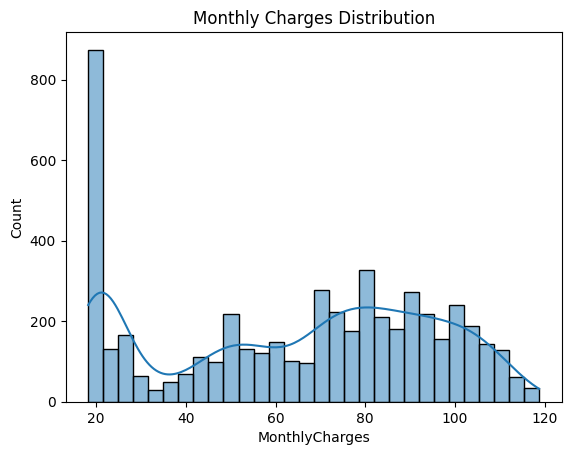

In [131]:
#Monthly Charges
sns.histplot(train_df['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

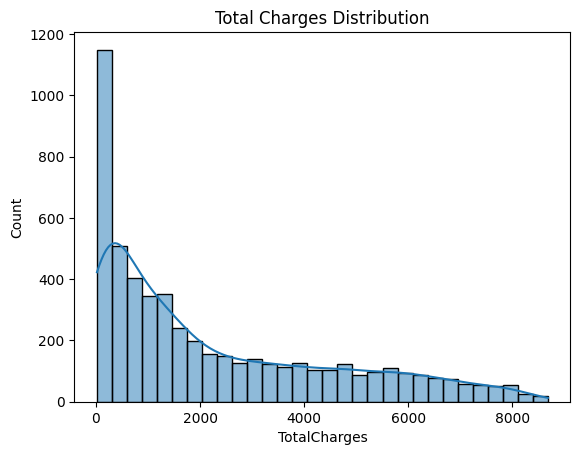

In [132]:
#Total Charges
sns.histplot(train_df['TotalCharges'], bins=30, kde=True)
plt.title("Total Charges Distribution")
plt.show()

Categorical Feature vs Churn

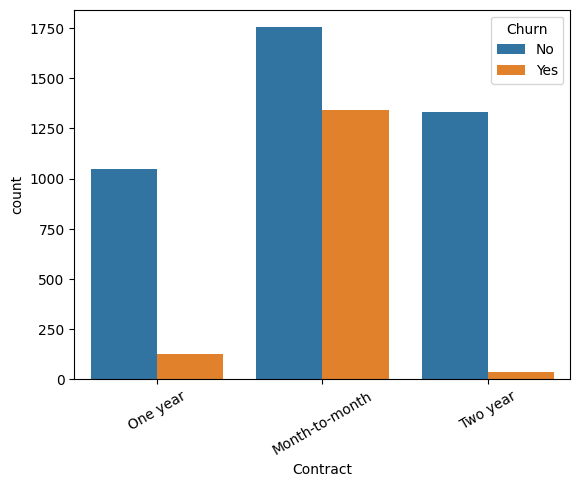

In [133]:
#Contract Type
sns.countplot(x='Contract', hue='Churn', data=train_df)
plt.xticks(rotation=30)
plt.show()

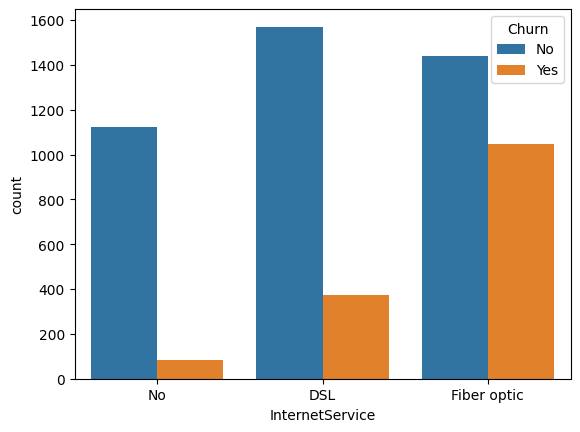

In [134]:
#Internet Service
sns.countplot(x='InternetService', hue='Churn', data=train_df)
plt.show()

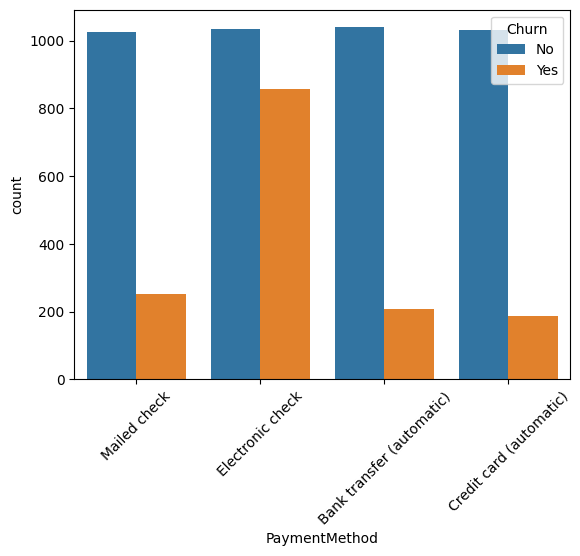

In [135]:
#Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=train_df)
plt.xticks(rotation=45)
plt.show()

Correlation Analysis

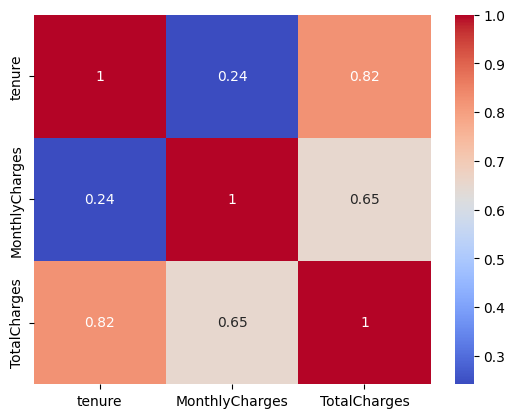

In [136]:
sns.heatmap(train_df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

Separating the Features and Target

In [137]:
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

Handling Missing values

In [138]:
#for Categorical columns

categorical_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in categorical_cols:
    X_train[col] = X_train[col].fillna('No')
    X_test[col] = X_test[col].fillna('No')

In [139]:
#for Numerical Variable (TotalCharges)
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

median_tc = X_train['TotalCharges'].median()

X_train['TotalCharges'] = X_train['TotalCharges'].fillna(median_tc)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(median_tc)

In [140]:
#Removing Customer id Coloumn
X_train.drop('customerID', axis=1, inplace=True)
X_test.drop('customerID', axis=1, inplace=True)

Encoding Categorical Variables (Label Encoding)

In [141]:
le = LabelEncoder()

for col in X_train.select_dtypes(include='object').columns:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [142]:
#Encoding Target Variable

y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

Scaling (StandardScaler)

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Outlier Handling

In [144]:
#i am not removing the outliers in order to avoid loss of important customer information.

# Feature Engineering

Customer Lifetime Value

In [145]:
X_train['Customer_Lifetime_Value'] = (
    X_train['tenure'] * X_train['MonthlyCharges']
)

X_test['Customer_Lifetime_Value'] = (
    X_test['tenure'] * X_test['MonthlyCharges']
)

Contract Stability Feature

In [146]:
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

X_train['Contract_Stability'] = X_train['Contract'].map(contract_map)
X_test['Contract_Stability'] = X_test['Contract'].map(contract_map)

X_train['Contract_Stability'] = X_train['Contract_Stability'].fillna(0)
X_test['Contract_Stability'] = X_test['Contract_Stability'].fillna(0)

Tenure x Contract Relation

In [147]:
X_train['Tenure_Contract'] = (
    X_train['tenure'] * X_train['Contract_Stability']
)

X_test['Tenure_Contract'] = (
    X_test['tenure'] * X_test['Contract_Stability']
)

Total Services Count

In [148]:
service_cols = [
    'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

X_train['Total_Services'] = (X_train[service_cols] == 1).sum(axis=1)
X_test['Total_Services'] = (X_test[service_cols] == 1).sum(axis=1)

In [149]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Feature Selection

In [150]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance.head(10)

,Feature,Importance
18,TotalCharges,0.150842
19,Customer_Lifetime_Value,0.139556
4,tenure,0.137039
17,MonthlyCharges,0.126782
14,Contract,0.071516
16,PaymentMethod,0.044499
8,OnlineSecurity,0.041731
11,TechSupport,0.039992
0,gender,0.030295
7,InternetService,0.025779


# Model Development

Training and Evaluating Models

In [151]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

### Training with Multiple Models

Logistic Regression

In [152]:
log_reg = LogisticRegression(max_iter=1000)
log_reg_results = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

Decision Tree

In [153]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_results = evaluate_model(dt_model, X_train, y_train, X_test, y_test)

KNN

In [154]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train, y_train, X_test, y_test)

Naive Bayes

In [155]:
nb_model = GaussianNB()
nb_results = evaluate_model(nb_model, X_train, y_train, X_test, y_test)

Support Vector Machine (SVM)

In [156]:
svm_model = SVC(kernel='rbf')
svm_results = evaluate_model(svm_model, X_train, y_train, X_test, y_test)

Comparing Model Performance

In [157]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "SVM"],
    "Accuracy": [
        log_reg_results["Accuracy"],
        dt_results["Accuracy"],
        knn_results["Accuracy"],
        nb_results["Accuracy"],
        svm_results["Accuracy"]
    ],
    "Precision": [
        log_reg_results["Precision"],
        dt_results["Precision"],
        knn_results["Precision"],
        nb_results["Precision"],
        svm_results["Precision"]
    ],
    "Recall": [
        log_reg_results["Recall"],
        dt_results["Recall"],
        knn_results["Recall"],
        nb_results["Recall"],
        svm_results["Recall"]
    ],
    "F1 Score": [
        log_reg_results["F1 Score"],
        dt_results["F1 Score"],
        knn_results["F1 Score"],
        nb_results["F1 Score"],
        svm_results["F1 Score"]
    ]
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.813343,0.666667,0.558904,0.608048
1,Decision Tree,0.733144,0.485934,0.520548,0.502646
2,KNN,0.765082,0.550296,0.509589,0.529161
3,Naive Bayes,0.719659,0.473404,0.731507,0.574812
4,SVM,0.811923,0.689394,0.498630,0.578696
